# Lecture 7

Lesson Objectives:
 - Introduce Forward and Backward Euler
 - Local Truncation Error vs. Global Error



___
Notation: When talking about numerical ODEs, we need to discuss notation. 

We note $y(t_i)$ as the true solution to the ODE at time $t_{i}$. 

We note $y_{i}$ as the approximate solution to the ODE at $t_{i}$.

When deriving a method, we sometimes make an assumption that $y_{i}=y(t_{i})$


____

### Forward Euler

Starting from a general Initial Value Problem 

$$\frac{dy}{dt}=f(t,y), \qquad t\in[a,b],$$
$$y(a)=C,$$

we can discretize the domain for $N+1$ time points
$$h=\frac{(b-a)}{N},\qquad t_{i}=a+ih.$$

Applying the simplest approximation (FD1) to the derivative

$$\frac{dy}{dt}\approx\frac{y_{i+1}-y_{i}}{h}$$

and evaluating the right side, $f(t,y)$, at $t_{i}$ and $y_{i}$, we can write a discrete approximation to the ODE

$$\frac{y_{i+1}-y_{i}}{h}=f(t_i,y_i).$$

Since we would like to advance the solution from our initial value, we can rearrange the terms that would advance the solution
$$\frac{y_{i+1}-y_{i}}{h}=f(t_i,y_i)$$
$$\Rightarrow y_{i+1}-y_{i}=hf(t_i,y_i)$$
$$\Rightarrow y_{i+1}=y_{i}+hf(t_i,y_i)$$
Assuming $y(0)=y_0$ lands us to the formulation for **Forward Euler**
$$y_{i+1}=y_{i}+hf(t_i,y_i),$$
$$y_0=C,$$
$$t_i\in[a,b], \qquad t_i=a+ih$$

There are a number of ways of deriving the same formula:

1. Taylor Series

If we're starting from a point $y_{i+1}=y(t_{i+1})$, we can take a Taylor series

$$y(t_{i+1})=y(t_i)+y'(t_i)(t_{i+1}-t_i)+O(h^{2})$$

If we truncate the series and only take the first two terms
$$y(t_{i+1})\approx y(t_i)+y'(t_i)(t_{i+1}-t_i)$$
we then note $h=(t_{i+1}-t_{i})$ and $y'(t_i)=f(t_i,y(t_i))$, and convert to the discretized form
$$y_{i+1}=y_{i}+hf(t_i,y_i)$$

2. Integration

If we apply the Fundamental Theorem of Calculus,
$$y(t_{i+1})-y_{i}=\int_{t_{i}}^{t_{i+1}}y'(t)dt$$
we can arrange the terms
$$y(t_{i+1})=y_{i}+\int_{t_{i}}^{t_{i+1}}y'(t)dt$$
From numerical integration/quadrature, we can approximate the integral in the following mannere
$$\int_{t_{i}}^{t_{i+1}}y'(t)dt\approx(t_{i+1}-t_{i})y'(t_{i})$$
we then note $h=(t_{i+1}-t_{i})$ and $y'(t_i)=f(t_i,y(t_i))$, and convert to the discretized form
$$y_{i+1}=y_{i}+hf(t_i,y_i)$$


___
Let's do an example

**Example** Given the following IVP
$$y'=t+y^{2}$$
$$y(0)=4$$
Note the analytical solution to this is not trivial and would require Bessel functions.

Let's compute approximation to the IVP using Forward Euler with $h=0.1$. The form of the approximation is the following

$$y_{i+1}=y_{i}+hf(t_i,y_i)=y_{i}+h(t_{i}+y_{i}^{2})$$

Now let's compute the first three timestep using $y_0=y(0)=4$,
$$\Rightarrow y_1=y_0+h(t_{0}+y_{0}^{2})=4+0.1(0+(4)^2)$$
$$=4+1.6=5.6$$
$$\Rightarrow y_2=y_1+h(t_{1}+y_{1}^{2})=5.6+0.1(0.1+(5.6)^2)$$
$$=5.6+3.146=8.746$$
$$\Rightarrow y_3=y_2+h(t_{2}+y_{2}^{2})=8.746+0.1(0.2+(8.746)^2)$$
$$=8.746+7.669=16.415$$

Below is a example of code for this process

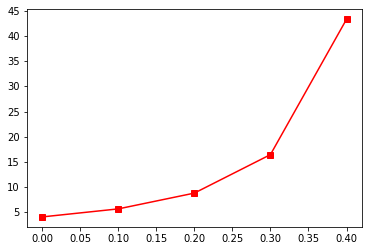

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def fun1(t,y):
    f=t+y**2
    return f

def ForwardEuler(t,yold,f):
    ynew=yold+h*f(t,yold)
    return ynew

h=0.1
y0=4.0
T=.4
N=int(T/h)
t=np.linspace(0,T,N+1)
y=np.zeros(N+1)
y[0]=y0
for i in range(0,N):
    y[i+1]= ForwardEuler(t[i],y[i],fun1)

plt.plot(t,y,'-sr')

_____
### Backward Euler

Starting from a general Initial Value Problem 

$$\frac{dy}{dt}=f(t,y), \qquad t\in[a,b],$$
$$y(a)=C,$$

we can use our Forward Euler approximation, 

$$\frac{y_{i+1}-y_{i}}{h}=f(t_i,y_i)$$

but alter it slightly and evaluate $f(t,y)$ at the $t_{i+1}$ and $y_{i+1}$,
$$\frac{y_{i+1}-y_{i}}{h}=f(t_{i+1},y_{i+1})$$
and we have the **Backward Euler** approximation. We can also write it as

$$y_{i+1}=y_{i}+hf(t_{i+1},y_{i+1})$$

Note: Backward Euler is an **implicit** method. **Implicit methods** use $y_{i+1}$ to approximate $y_{i+1}$.  **Explicit methods** do not use $y_{i+1}$ in their approximation of $y_{i+1}$. Forward Euler is an **explicit** method. Note that not every ODE can have an implicit form.

____

**Example** Let's try to use Backward Euler for the previous ODE

$$y'=t+y^{2}$$
$$y(0)=4$$

We need a formula for $y_{i+1}$. Evaluating the right hand side at $t_{i+1}$ and $y_{i+1}$

$$y_{i+1}=y_{i}+hf(t_{i+1},y_{i+1})=y_{i}+h(t_{i+1}+y_{i+1}^{2})$$

We can try bringing the terms associated with $y_{i+1}$ to the left hand side
$$y_{i+1}-hy_{i+1}^{2}=y_{i}+ht_{i+1}$$

There is no way to isolate $y_{i+1}$ by itself. We cannot approximate this ODE using Backward Euler. 

**Example** Let's try using Backward Euler for another ODE

$$y'=-100y$$
$$y(0)=1$$

Applying our discretization
$$y_{i+1}=y_{i}+hf(t_{i+1},y_{i+1})=y_{i}+h(-100y_{i+1})=y_{i}-100hy_{i+1}$$
Bringing the $y_{i+1}$ terms to the right hand side

$$y_{i+1}+100hy_{i+1}=y_{i}$$
$$y_{i+1}(1+100h)=y_i$$
We can find a formula to advance $y_{i+1}$

$$y_{i+1}=\frac{y_{i}}{1+100h}$$

Using $h=0.1$, we can advance our solution

$$\Rightarrow y_{1}=\frac{y_{0}}{1+100h}=\frac{1}{1+100(0.1)}$$
$$=\frac{1}{1+100(0.1)}=\frac{1}{11}$$
$$\Rightarrow y_{2}=\frac{y_{1}}{1+100h}=\frac{1/11}{11}$$
$$=1/121$$
$$\Rightarrow y_{3}=\frac{y_{2}}{1+100h}=\frac{1/121}{11}$$
$$=1/1331$$


____

### Local Error vs Global Error

There are two types of error that we consider for numerical ODE Methods

 - Local Error: The error associated with a single time step
 - Global Error: The accumulation of errors

Generally, if local error is order $q$  ($O(h^{q})$) then global error is usually order $q-1$ ($O(h^{q-1})$).

#### Local Error
With local error we consider the difference between the true solution at time $t_{i}$ and the approximate solution at $t_{i}$ based off the numerical method, assuming that all previous timesteps were exact. This includes truncation/approximation errors and round off/machine precision errors. We'll focus on the former.

$$\epsilon_{i}=y(t_{i})-[\mbox{Numerical Approximation of y(t_{i})}]$$
Finding the local error for Forward Euler

$$\epsilon_{i}=y(t_{i})-[y_{i-1}+hf(t_{i-1},y_{i-1})]=y(t_{i})-[y_{i-1}+hy'_{i-1}]$$

Assume $y_{i-1}=y(t_{i-1})$ and $y'_{i-1}=y'(t_{i-1})$, 
$$\epsilon_{i}=y(t_{i})-[y(t_{i-1})+hy'(t_{i-1})]$$

Take Taylor series of both terms in the Forward Euler update at $t_{i}$,
$$y(t_{i-1})=y(t_i)-hy'(t_{i})+\frac{h^{2}}{2}y''(t_{i})+O(h^{3})$$
$$y'(t_{i-1})=y'(t_i)-hy''(t_{i})+O(h^{2})$$

Plug the terms back in
$$\epsilon_{i}=y(t_{i})-[(y(t_i)-hy'(t_{i})+\frac{h^{2}}{2}y''(t_{i})+O(h^{3}))+h(y'(t_i)-hy''(t_{i})+O(h^{2})))]$$
$$=y(t_{i})-[(y(t_i)-hy'(t_{i})+\frac{h^{2}}{2}y''(t_{i})+O(h^{3}))+hy'(t_i)-h^{2}y''(t_{i})+O(h^{3})))]$$
$$=-\frac{h^{2}}{2}y''(t_{i})+h^{2}y''(t_{i})+O(h^{3})$$
$$=\frac{h}{2}y''(t_{i})+O(h^{3})))]=\frac{h}{2}y''(c_{i}), \qquad c_{i}\in(t_{i-1},t_{i})$$

So our local error is of order 2, $O(h^{2})$.

#### Global Error

We can think of global error as the accumulation of the local errors

$$e_{N}=\sum_{i=1}^{N}\epsilon_i$$
at the last time step $t_{N}$

The general proof to show the loss of an order of accuracy goes as follows:

Let $\epsilon_{i}=\alpha f^{(q)}(c_{i})h^{q}$, where $c_{i}\in(t_{i-1},t_{i})$, $\alpha$ is a constant determined from local error, and $q$ is the order of the local error.

$$e_{N}=\sum_{i=1}^{N}\epsilon_i=\sum_{i=1}^{N}\alpha f^{(q)}(c_{i})h^{q}=\alpha h^{q}\sum_{i=1}^{N}f^{(q)}(c_{i})$$

Assume that $f^{(q)}(\mu)$ is the average value of $f^{(q)}(c_{i})$,

$$f^{(q)}(\mu)=\frac{\sum_{i=1}^{N}f^{(q)}(c_{i})}{N}$$
$$\Rightarrow \sum_{i=1}^{N}f^{(q)}(c_{i})=N f^{(q)}(\mu)$$

Remember $N=(b-a)/h$ and plug this into our global error estimate,

$$e_{N}=\alpha h^{q}\sum_{i=1}^{N}f^{(q)}(c_{i})=\alpha h^{q}Nf^{(q)}(\mu)$$
$$=\alpha h^{q}\frac{(b-a)}{h}f^{(q)}(\mu)$$
$$=\alpha(b-a)f^{(q)}(\mu) h^{q-1}$$
$$=O(h^{q-1})$$